#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore')
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("winequality-red.csv")
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [120]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [121]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
bins = (2, 6.5, 8)
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = ['bad','good'])

## Data Visualization

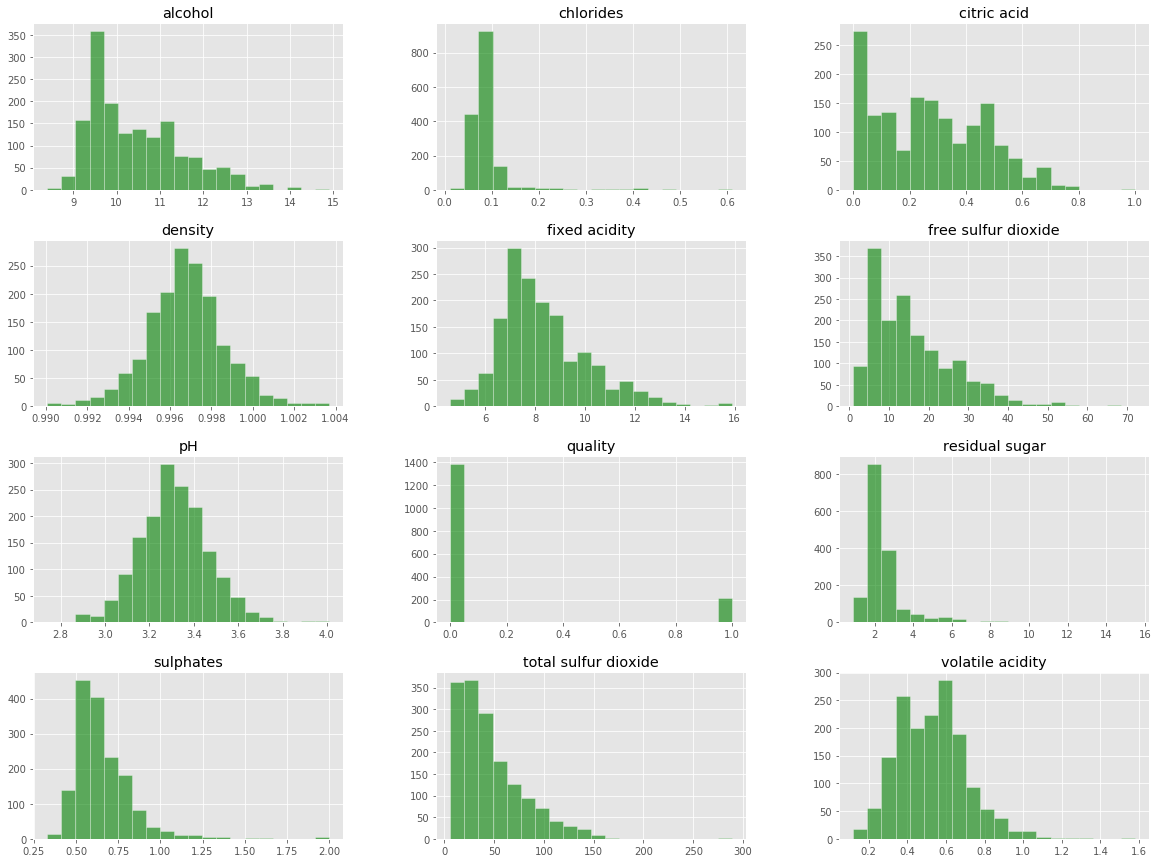

In [160]:
df.hist(figsize=(20,15),ec='white',bins=20,color='green',alpha=0.6)
plt.show()

This graph gives the histogram plots for each attributes in our dataset. It tells us the count of appearances of each value in each of the attributes. The x-values gives the range of values of the particular attribute and the y-values gives the count of each range.

<Figure size 720x360 with 0 Axes>

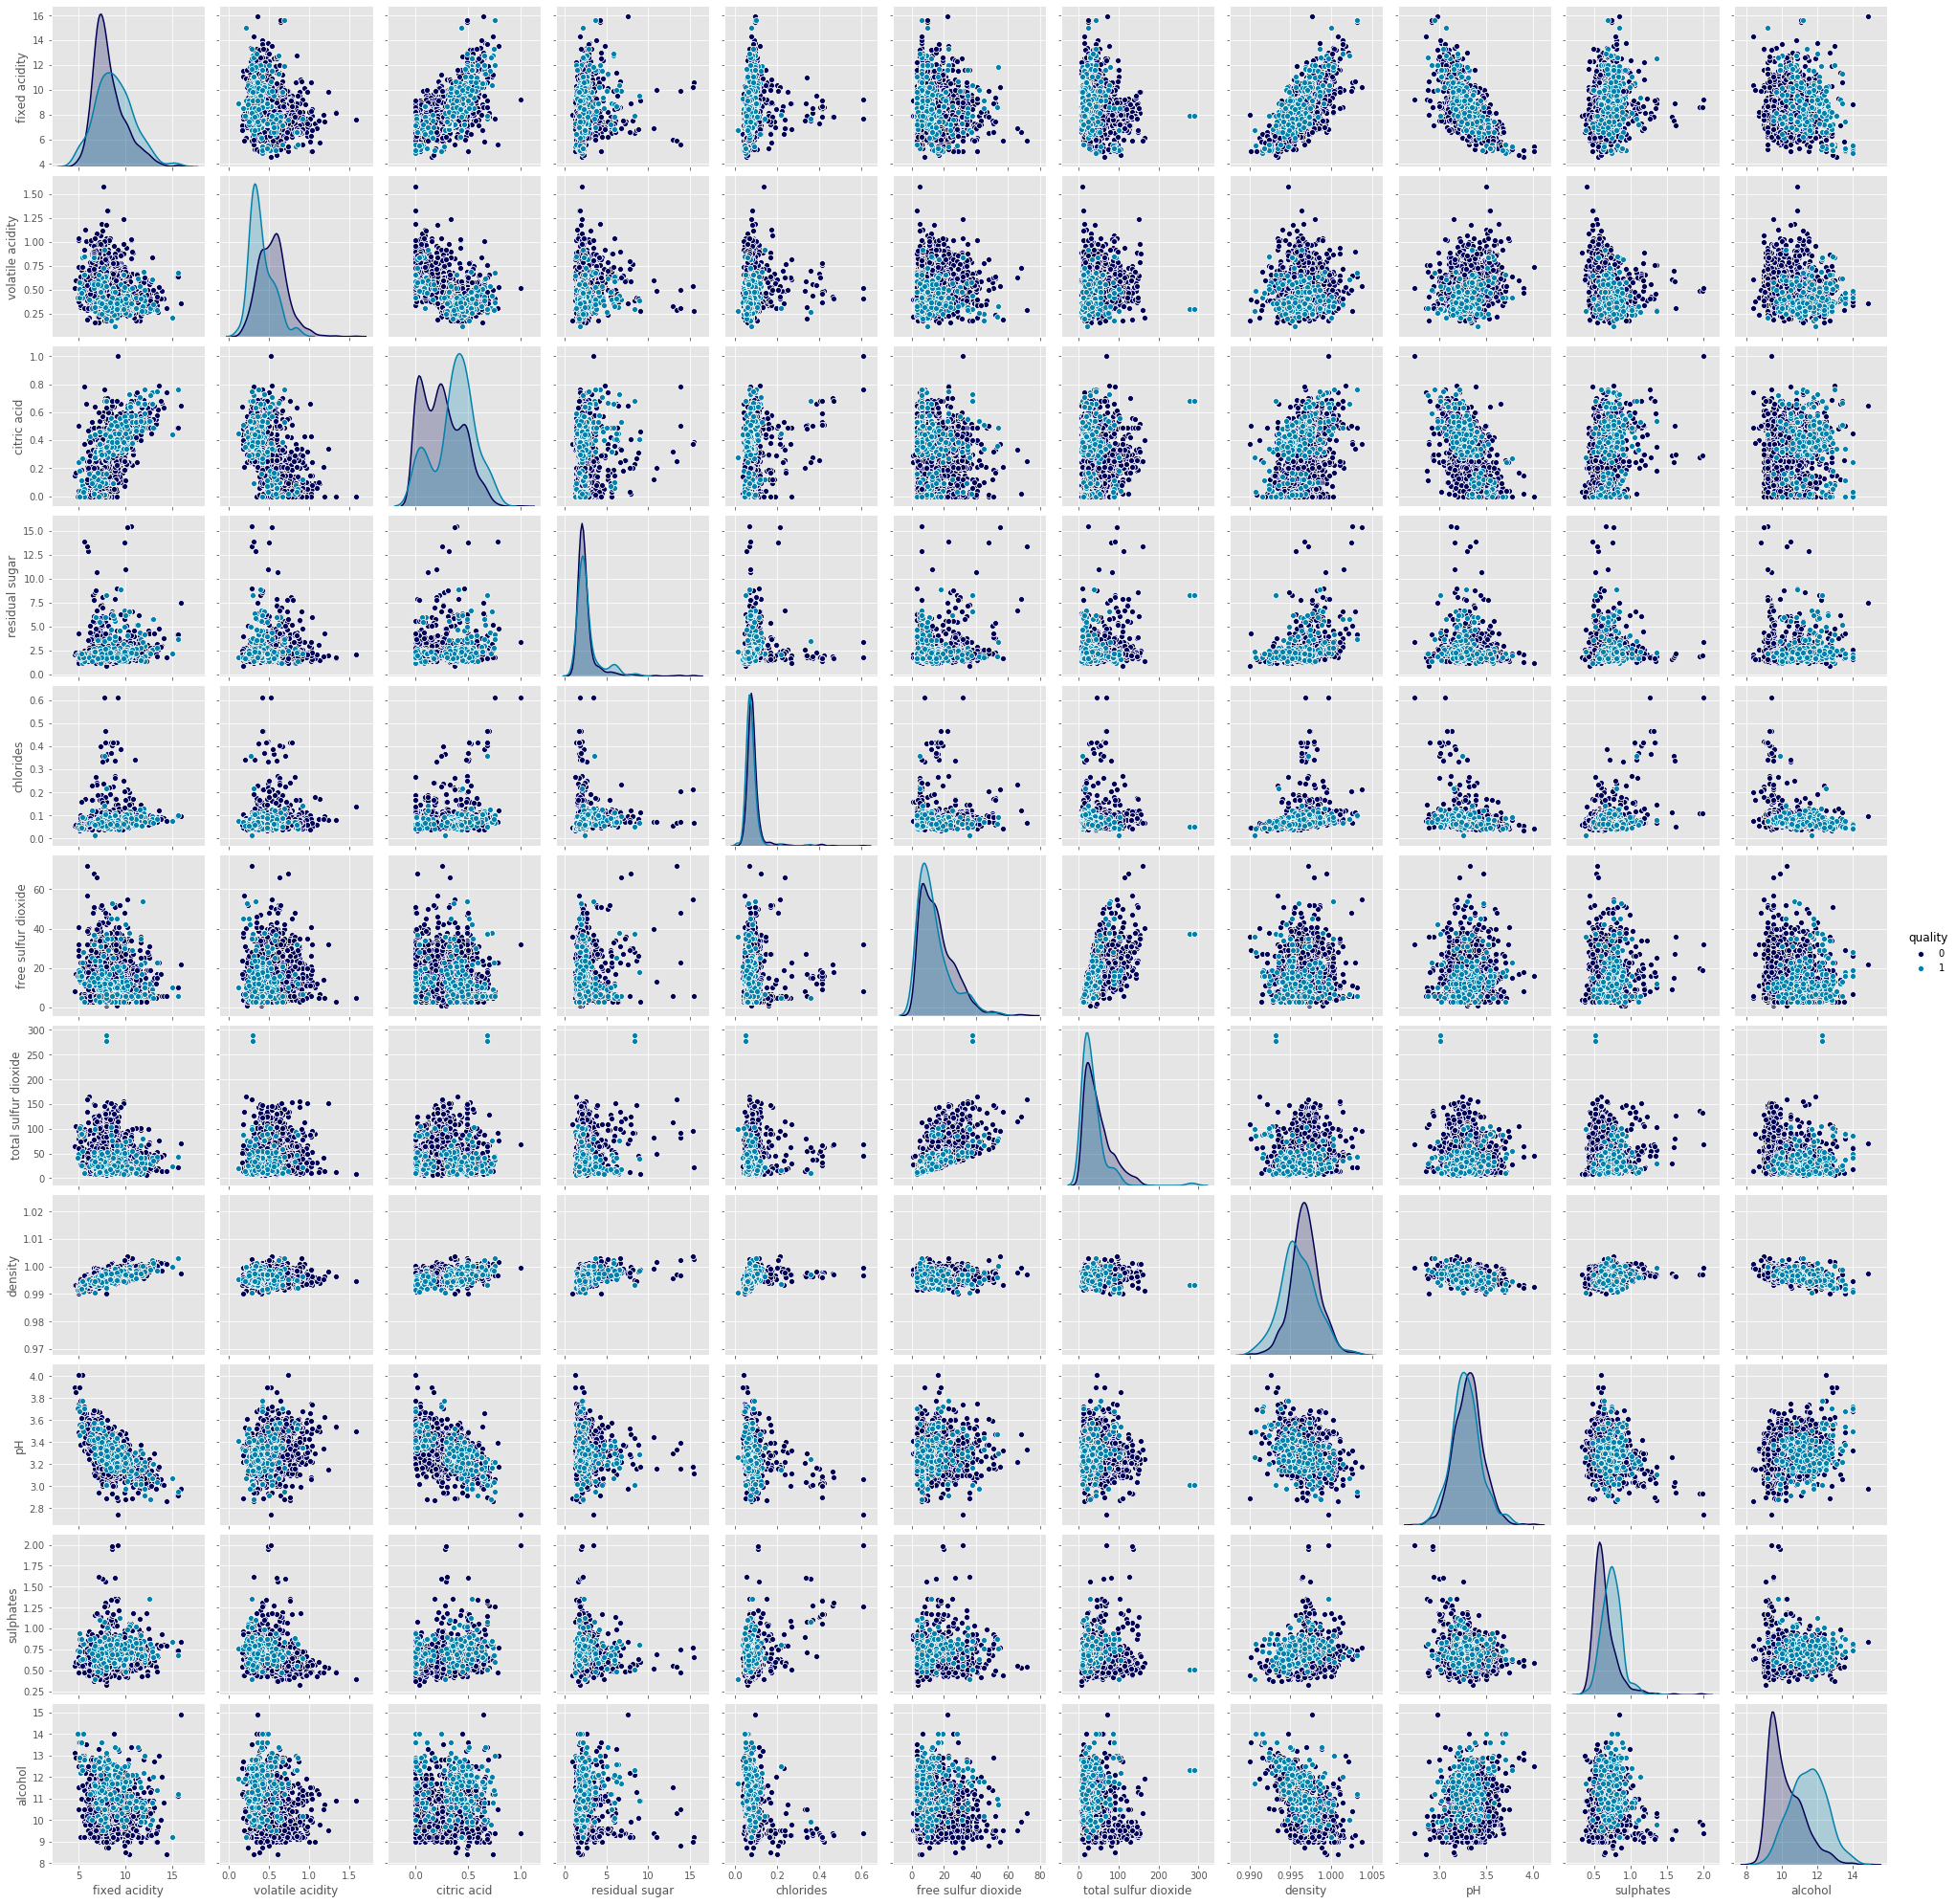

In [106]:
plt.figure(figsize=(10,5))
sns.pairplot(df, hue="quality", palette="ocean",diag_kind="kde")

Above is a pairplot for the whole dataset. It gives the relation between each of the attributes with one another through scatter plots. And it also gives the kde plot of each attribute. The dark blue squares represent the bad wine quality or 0 and the light blue squares represent good wine quality or 1. The scatter plot gives the relation of two attributes one on the x-axis and other on the y. Each scatter plot can be studied thoroughly to gain more insights on attributes relationship

In [135]:
def kdeandbox(att1,att2):
    
    plt.figure(figsize=(14,9))
    
    plt.subplot(2,2,1)
    sns.kdeplot(df.loc[df["quality"]=='bad'][att1],shade=True,color='red')
    sns.kdeplot(df.loc[df["quality"]=='good'][att1],shade=True,color='blue')
    plt.legend(["bad","good"])
    plt.title(att1.upper(),fontsize=15)
    
    plt.subplot(2,2,2)
    sns.kdeplot(df.loc[df["quality"]=='bad'][att2],shade=True,color='red')
    sns.kdeplot(df.loc[df["quality"]=='good'][att2],shade=True,color='blue')
    plt.legend(["bad","good"])
    plt.title(att2.upper(),fontsize=15)
    
    plt.subplot(2,2,3)
    sns.violinplot(data=df,y=att1,x="quality",palette='viridis')
    
    plt.subplot(2,2,4)
    
    sns.violinplot(data=df,y=att2,x="quality",palette='viridis')
    
    plt.show()

Each of the below plots contain kde plots and violin plots for each attribute one below the other. KDE plot gives the probability distribution of a continuos variable. In this case the continuos variable are the values of each attribute. Higher the probability density, more is the appearence of that value in the attribute. Wherease violin plots are combination of a box plot and a KDE plot. The white dot on a violin plot gives the median of the range. The black bar in the centre of the plot gives the interquartile range of the attribute. Hence the violin plot and the KDE plot gives the complete information of each of the attribute. A total of 11 such combined plots are made for the attributes and each of them are seperated by the 'quality' variable ie 1 for good quality wine and 0 for bad quality wine.

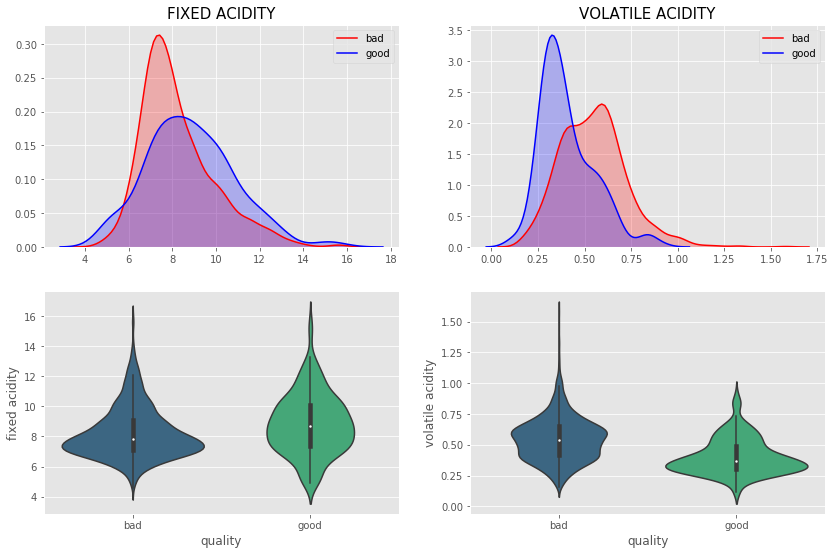

In [136]:
kdeandbox("fixed acidity","volatile acidity")

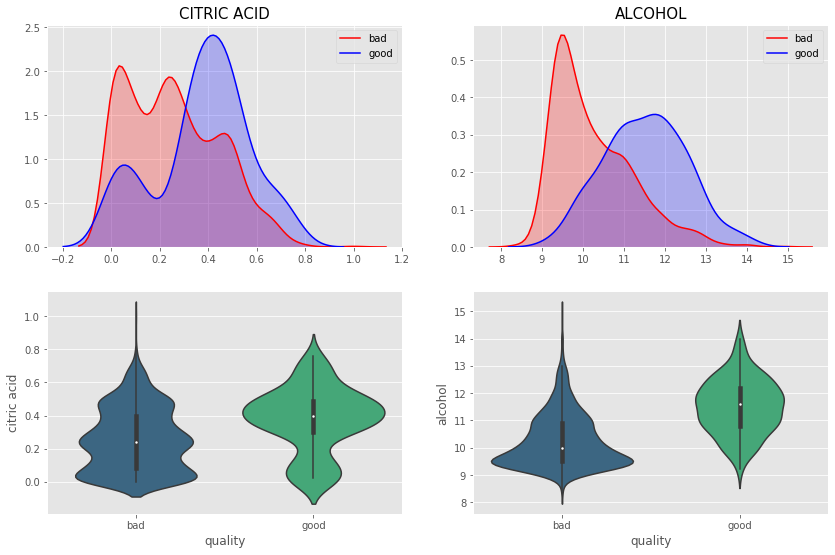

In [137]:
kdeandbox("citric acid","alcohol")

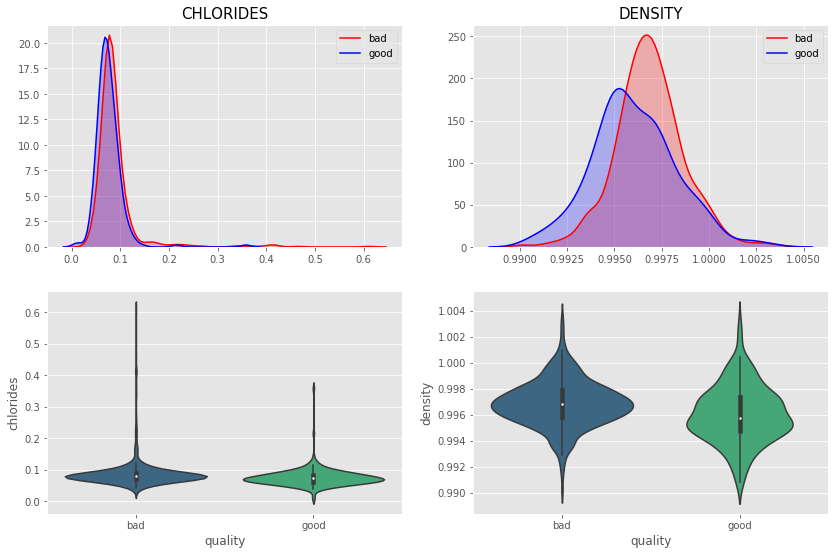

In [138]:
kdeandbox("chlorides","density")

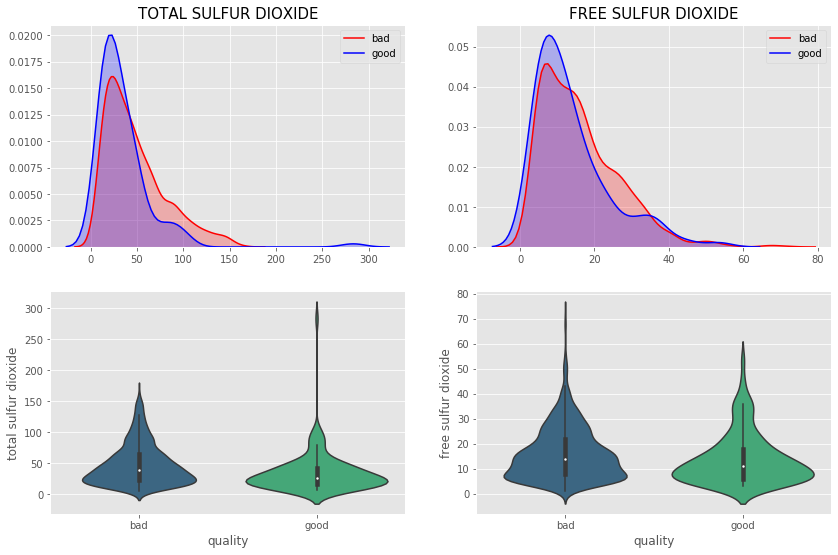

In [139]:
kdeandbox("total sulfur dioxide","free sulfur dioxide")

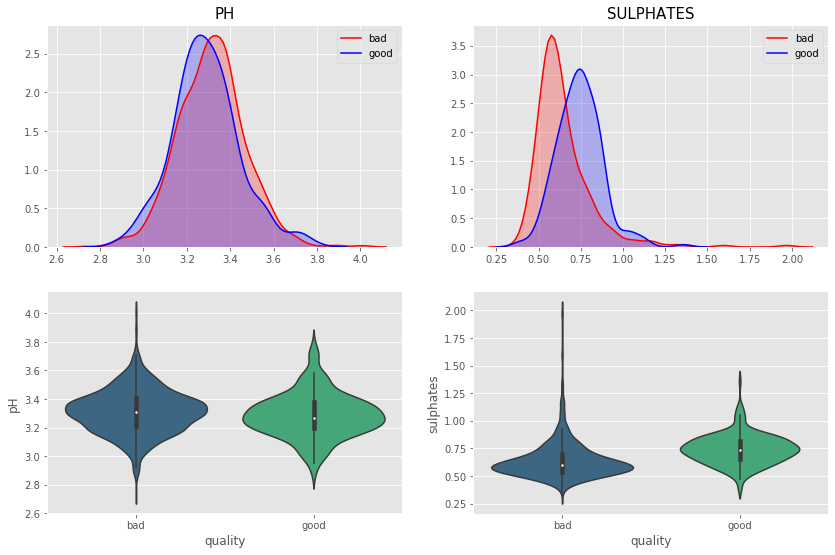

In [140]:
kdeandbox("pH","sulphates")

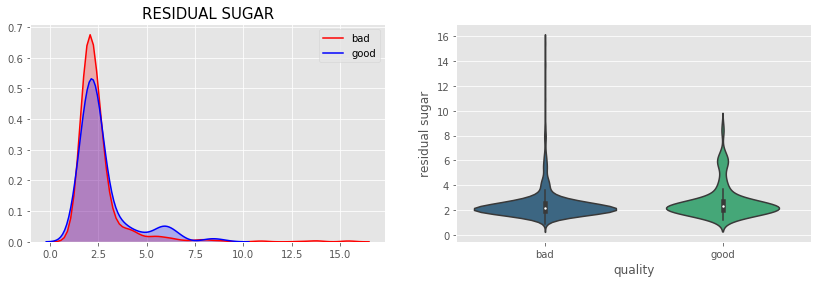

In [144]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.kdeplot(df.loc[df["quality"]=='bad']["residual sugar"],shade=True,color='red')
sns.kdeplot(df.loc[df["quality"]=='good']["residual sugar"],shade=True,color='blue')
plt.legend(["bad","good"])
plt.title("residual sugar".upper(),fontsize=15)

plt.subplot(1,2,2)
sns.violinplot(data=df,y="residual sugar",x="quality",palette='viridis')
plt.show()

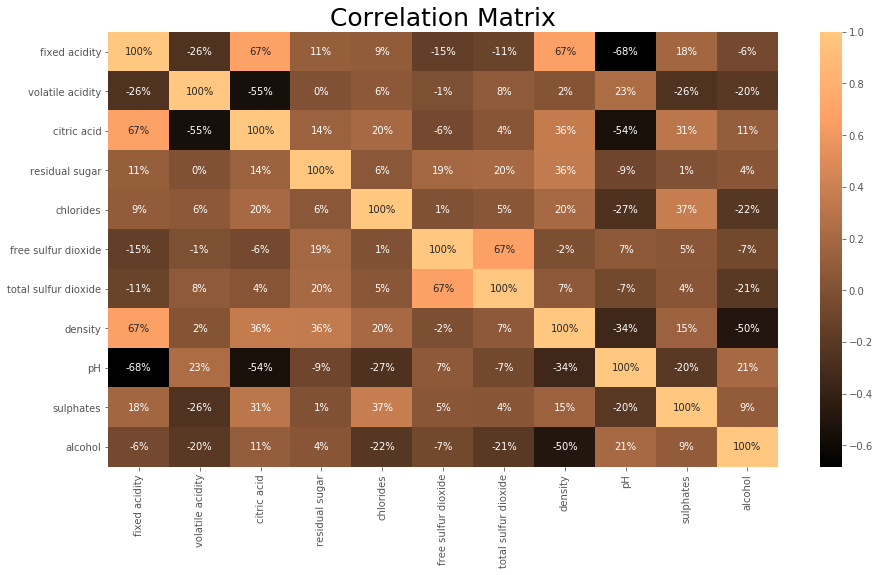

In [111]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt=".0%",cmap='copper')
plt.title('Correlation Matrix',size=25)
plt.show()

## Data Preprocessing

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [17]:
labelencoder = LabelEncoder()
df['quality'] = labelencoder.fit_transform(df['quality'])

In [18]:
X = df.drop(['quality'], axis=1)
y = df.loc[:,['quality']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)

In [51]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279, 1)
Shape of y_test (320, 1)


In [52]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
X_train = sc1.fit_transform(X_train)
X_test = sc2.fit_transform(X_test)

## Prediction Algorithms

#### Logistic Regression

In [53]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [54]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 90.625


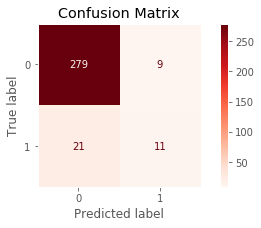

In [55]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model1, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

#### Decision Tree Classifier

In [56]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [57]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 90.3125


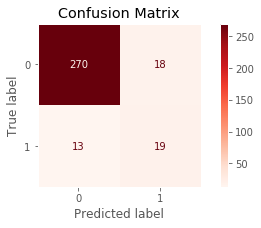

In [58]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model2, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

#### Naive Bayes Classifier

In [59]:
model3 = GaussianNB()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

In [60]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 80.0


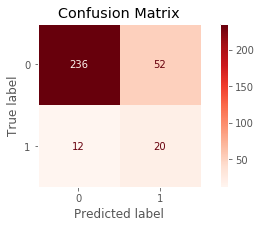

In [61]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model3, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

#### Random Forest

In [62]:
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)

In [63]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 91.5625


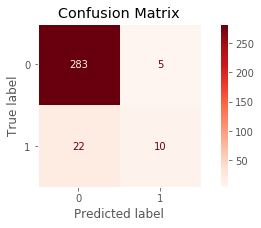

In [64]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model4, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

#### Support Vector Machine

In [65]:
model5 = SVC()
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)

In [66]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 90.625


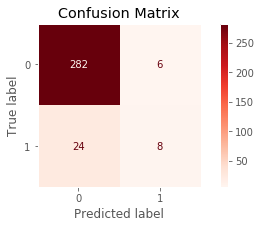

In [67]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model5, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

Hence **Random Forest Algorithm** gives the best accuracy score. We will further fine tune the model to get the best accuracy


----

## Fine Tunning the Model

In [92]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
             }

In [93]:
model = RandomForestClassifier()

#### Applying Grid Search on Random Forest

In [94]:
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_s

[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60, total=   0.3s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60, total=   0.2s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60, total=   0.3s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_s

[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.3s
[CV] max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90, total=   0.4s
[CV] max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90, total=   0.3s
[CV] max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90, total=   0.3s
[CV] max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=2, max_features=auto, min_samples_leaf=2, min_samples

[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.1s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.1s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_s

[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60, total=   0.2s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_s

[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.3s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=90 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=90, total=   0.3s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=90 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=90, total=   0.3s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=90 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=90, total=   0.3s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples

[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.1s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.1s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_s

[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60, total=   0.2s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60, total=   0.3s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60, total=   0.2s
[CV] max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_s

[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.3s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90, total=   0.4s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90, total=   0.5s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=90, total=   0.4s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=4, max_features=auto, min_samples_leaf=2, min_samples

[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30, total=   0.1s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_s

[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, total=   0.3s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, total=   0.2s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60, total=   0.3s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60, total=   0.3s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60, total=   0.2s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_s

[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=80, total=   0.4s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=90 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=90, total=   0.4s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=90 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=90, total=   0.4s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=90 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=90, total=   0.4s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [96]:
# Getting the Best Parameters for Random Forest
grid.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 30}

In [116]:
# Creating the model with the best params
finalmodel = RandomForestClassifier(max_depth=4,max_features='auto',min_samples_leaf=2,min_samples_split=5,n_estimators=30)

In [117]:
finalmodel.fit(X_train,y_train)
y_pred = finalmodel.predict(X_test)

In [118]:
score = accuracy_score(y_test, y_pred)
print('Final Accuracy Score = ' + str(score*100))

Final Accuracy Score = 91.875


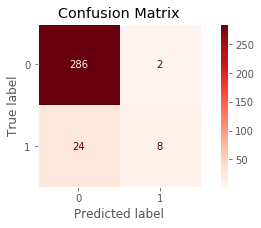

In [119]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(finalmodel, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

### Cross Validation Score of the models

In [129]:
def CrossValidationScore(model_list):
    global X,y
    
    mean = []
    modelname = []
    
    for model in model_list:
        modelname.append(type(model).__name__)
        
    for i in model_list:
        scores = cross_val_score(i, X, y, cv=5)
        mean.append(scores.mean())
        
    cvs = pd.DataFrame({"Model Name":modelname,"CVS":mean})
    return cvs.style.background_gradient("Greens")

In [130]:
model_list=[model1,model2,model3,model4,model5,finalmodel]

In [131]:
CrossValidationScore(model_list)

,Model Name,CVS
0,LogisticRegression,0.869295
1,DecisionTreeClassifier,0.811127
2,GaussianNB,0.806793
3,RandomForestClassifier,0.866172
4,SVC,0.864291
5,RandomForestClassifier,0.873678
